In [1]:
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegFileWriter
from IPython.display import HTML
import numpy as np

In [2]:
%%time
dataset = xr.open_mfdataset(
    paths='/storage/data/eumetsat/native/reprojected/2019-01-01T??.nc',
    concat_dim='time',
    #combine='by_coords'
)

da = dataset['HRV']

CPU times: user 255 ms, sys: 21.2 ms, total: 276 ms
Wall time: 727 ms


/home/jack/miniconda3/envs/sat_image_processing/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/jack/miniconda3/envs/sat_image_processing/lib/python3.7/site-packages/xarray/backends/api.py:931: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before co

In [3]:
# da = xr.open_dataarray('/storage/data/eumetsat/native/reprojected/2019-01-01T12.nc')

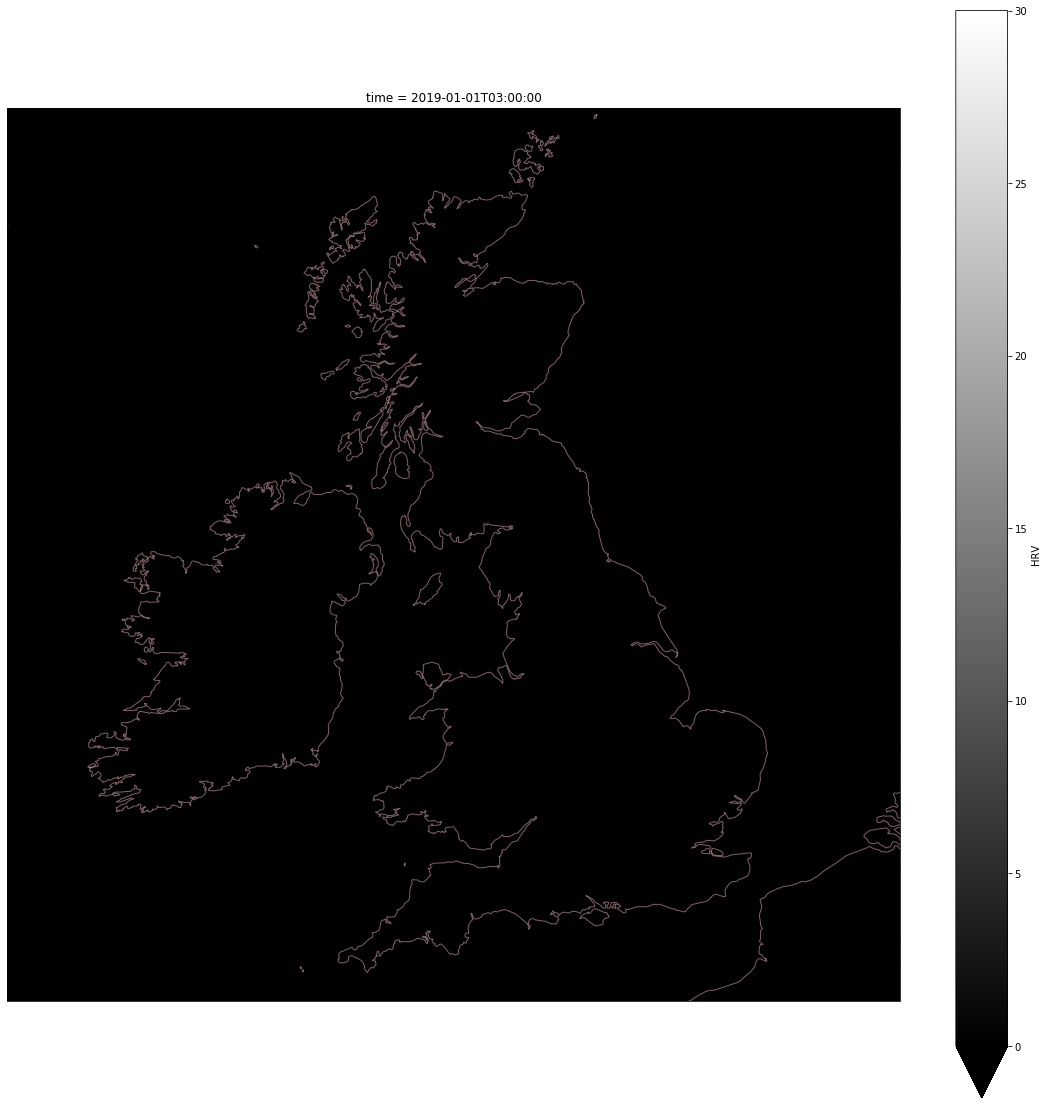

In [4]:
fig = plt.figure(figsize=(20, 20))
crs = ccrs.TransverseMercator()
ax = plt.axes(projection=crs)
ax.coastlines(resolution='10m', alpha=0.5, color='pink')

img = da[0, 2400:3500, 2400:3500].plot.imshow(ax=ax, cmap='gray', origin='upper', vmin=0, vmax=30)

def init():
    img.set_data(da[0, 2400:3500, 2400:3500])
    return img,

def update(i):
    img.set_data(da[i, 2400:3500, 2400:3500])
    ax.set_title(da.time[i])
    return img,

#anim = FuncAnimation(fig, func=update, frames=np.arange(1, da.time.size), init_func=init, interval=100, blit=True)
#anim.save('clouds.gif', writer='imagemagick')
#html = anim.to_html5_video()
#HTML(html)

In [5]:
#anim.save(filename='clouds.gif', writer=FFMpegFileWriter, dpi=80)

In [7]:
# Docs: https://matplotlib.org/3.1.1/api/animation_api.html#writer-classes
moviewriter = FFMpegFileWriter(fps=10)
init()
with moviewriter.saving(fig, 'myfile2.mp4', dpi=100):
    for i in np.arange(1, da.time.size):
        update(i)
        moviewriter.grab_frame()